In [1]:
import pandas as pd
import numpy as np

In [44]:
data = pd.read_csv('balance-scale.data', 
                 names='balance left_wt left_dt right_wt right_dt'.split())
data.sample(10) #head(20)

,balance,left_wt,left_dt,right_wt,right_dt
256,R,3,1,2,2
164,R,2,2,3,5
575,L,5,4,1,1
162,R,2,2,3,3
530,L,5,2,2,1
498,B,4,5,5,4
504,B,5,1,1,5
414,R,4,2,3,5
213,R,2,4,3,4
327,L,3,4,1,3


In [3]:
data.balance.value_counts()

R    288
L    288
B     49
Name: balance, dtype: int64

In [4]:
data['target'] = [1 if b=='B' else 0 for b in data.balance]

In [5]:
data.head()

,balance,left_wt,left_dt,right_wt,right_dt,target
0,B,1,1,1,1,1
1,R,1,1,1,2,0
2,R,1,1,1,3,0
3,R,1,1,1,4,0
4,R,1,1,1,5,0


In [6]:
data.target.value_counts(normalize=True)

0    0.9216
1    0.0784
Name: target, dtype: float64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
features = 'left_wt left_dt right_wt right_dt'.split()
X = data[features]
y = data.target

In [9]:
lgr_0 = LogisticRegression()
lgr_0.fit(X,y)
pred_y_0 = lgr_0.predict(X)

In [10]:
accuracy_score(y,pred_y_0)

0.9216

In [11]:
set(pred_y_0)

{0}

### Upsampling

In [12]:
from sklearn.utils import resample

In [13]:
majority = data[data.target==0]
minority = data[data.target==1]

In [14]:
minority_upsampled = resample( minority, replace=True,
                             n_samples = len(majority),
                             random_state=123)

In [15]:
len(majority), len(minority_upsampled)

(576, 576)

In [16]:
type(majority); type(minority_upsampled)

pandas.core.frame.DataFrame

In [17]:
upsampled = pd.concat([majority, minority_upsampled])

In [18]:
upsampled.target.value_counts()

0    576
1    576
Name: target, dtype: int64

In [19]:
X = upsampled[features]
y = upsampled.target

In [20]:
lgr_up = LogisticRegression()
lgr_up.fit(X,y)
pred_y_up = lgr_up.predict(X)

In [21]:
set(pred_y_up)

{0, 1}

In [22]:
accuracy_score(y, pred_y_up)

0.5147569444444444

### Down sample

In [23]:
majority = data[data.target==0]
minority = data[data.target==1]

majority_downsampled = resample( majority, replace=False,
                             n_samples = len(minority),
                             random_state=123)

downsampled = pd.concat([majority_downsampled, minority])

In [24]:
downsampled.target.value_counts()

0    49
1    49
Name: target, dtype: int64

In [25]:
X = downsampled[features]
y = downsampled.target

lgr_down = LogisticRegression()
lgr_down.fit(X,y)
pred_y_down = lgr_down.predict(X)

accuracy_score(y, pred_y_down)

0.5612244897959183

## AUC

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
prob_y_down = lgr_down.predict_proba(X)

In [28]:
prob_y_down[:5]

array([[0.54846803, 0.45153197],
       [0.51273876, 0.48726124],
       [0.52761039, 0.47238961],
       [0.52985389, 0.47014611],
       [0.4123397 , 0.5876603 ]])

In [29]:
prob_y_down_1 = [p1 for p0,p1 in prob_y_down]

In [30]:
roc_auc_score(y,prob_y_down_1)

0.5651811745106206

# RF

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
X = data[features]
y = data.target

In [33]:
clf_rf = RandomForestClassifier()

In [34]:
clf_rf.fit(X,y)

RandomForestClassifier()

In [35]:
pred_y_rf = clf_rf.predict(X)

In [36]:
accuracy_score(y, pred_y_rf)

1.0

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)

In [39]:
dt.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [40]:
%matplotlib inline

[Text(0.5208333333333334, 0.9, 'right_dt <= 2.5\ngini = 0.145\nsamples = 625\nvalue = [576, 49]'),
 Text(0.3125, 0.7, 'left_wt <= 2.5\ngini = 0.154\nsamples = 250\nvalue = [229, 21]'),
 Text(0.16666666666666666, 0.5, 'right_wt <= 2.5\ngini = 0.241\nsamples = 100\nvalue = [86, 14]'),
 Text(0.08333333333333333, 0.3, 'left_dt <= 2.5\ngini = 0.289\nsamples = 40\nvalue = [33, 7]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(0.125, 0.1, 'gini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.25, 0.3, 'left_dt <= 2.5\ngini = 0.206\nsamples = 60\nvalue = [53, 7]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.278\nsamples = 36\nvalue = [30, 6]'),
 Text(0.4583333333333333, 0.5, 'left_dt <= 2.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]'),
 Text(0.4166666666666667, 0.3, 'right_wt <= 2.5\ngini = 0.206\nsamples = 60\nvalue = [53, 7]'),
 Text(0.375, 0.1, 'gini = 0.08\nsamples = 

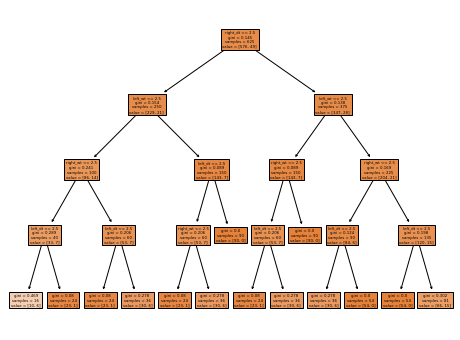

In [41]:
plt.figure(figsize=(8,6))
plot_tree(dt, feature_names=features, filled=True)